In [1]:
#  make a new data set with some coverted values

In [2]:
# import some libraries
import pandas as pd
import numpy as np

In [3]:
# Data csv files downloaded from Kaggle.  
# Let's read the student maths data set into a Dataframe called 'studentmath
studentmath = pd.read_csv('student-mat.csv')  
# read the student portuguese data into a Dataframe called 'studentport'
studentport = pd.read_csv('student-por.csv')  

In [4]:
# add average grade
studentmath['Average'] = ((studentmath.G1 + studentmath.G2 + studentmath.G3)/3)

In [5]:
#now drop the original three and keep the average
studentmath = studentmath.drop('G1',axis=1)


In [6]:
studentmath = studentmath.drop('G2',axis=1)


In [7]:
#studentmath = studentmath.drop('G3',axis=1)

In [8]:
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

In [ ]:
# need data with no categories so use dummies to convert then drop the others

In [19]:
student_with_dummies = pd.get_dummies(data=studentmath, columns = ['sex', 'Mjob', 'Fjob','school','internet', 'higher', 'Pstatus', 'romantic','famsize','paid','activities', 'nursery'], prefix = ['sex', 'Mjob', 'Fjob','school','internet', 'higher', 'Pstatus', 'romantic','famsize','paid', 'activities', 'nursery'] )

# Inspect 

In [20]:
student_with_dummies.head()

,age,address,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,...,romantic_no,romantic_yes,famsize_GT3,famsize_LE3,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes
0,18,U,4,4,course,mother,2,2,0,yes,...,1,0,1,0,1,0,1,0,0,1
1,17,U,1,1,course,father,1,2,0,no,...,1,0,1,0,1,0,1,0,1,0
2,15,U,1,1,other,mother,1,2,3,yes,...,1,0,0,1,0,1,1,0,0,1
3,15,U,4,2,home,mother,1,3,0,no,...,0,1,1,0,0,1,0,1,0,1
4,16,U,3,3,home,father,1,2,0,no,...,1,0,1,0,0,1,1,0,0,1


In [21]:
student_with_dummies.columns

Index(['age', 'address', 'Medu', 'Fedu', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'Average', 'sex_F',
       'sex_M', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'school_GP', 'school_MS',
       'internet_no', 'internet_yes', 'higher_no', 'higher_yes', 'Pstatus_A',
       'Pstatus_T', 'romantic_no', 'romantic_yes', 'famsize_GT3',
       'famsize_LE3', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes'],
      dtype='object')

In [24]:
#drop all categorical columns now
student_with_dummies = student_with_dummies.drop('address',axis=1)
student_with_dummies = student_with_dummies.drop('reason',axis=1)
student_with_dummies = student_with_dummies.drop('guardian',axis=1)
student_with_dummies = student_with_dummies.drop('schoolsup',axis=1)
student_with_dummies = student_with_dummies.drop('famsup',axis=1)

In [26]:
student_with_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,romantic_no,romantic_yes,famsize_GT3,famsize_LE3,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,1,0,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,1,0,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,1,1,0,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,0,1,1,0,0,1


In [27]:
X = student_with_dummies.iloc[:, :-1]
y = student_with_dummies.iloc[:, -1]

# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
X.shape

(395, 44)

In [30]:
########## Linear Regression Model Without Regularization ##########
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_
# What are these numbers?

array([  1.97328423e-16,   4.92661467e-16,  -2.77555756e-16,
        -1.80411242e-16,  -4.33680869e-16,   3.05311332e-16,
         1.38777878e-16,   6.93889390e-17,  -3.33066907e-16,
         1.38777878e-16,   1.59594560e-16,   1.73472348e-17,
        -3.46944695e-17,   1.38777878e-16,  -7.97972799e-17,
         1.06165077e-15,  -3.26128013e-16,   3.12250226e-16,
        -2.15105711e-16,   3.26128013e-16,   4.51028104e-17,
        -1.04777298e-15,  -5.55111512e-16,  -3.74700271e-16,
        -6.93889390e-16,   1.00613962e-16,   6.93564130e-16,
         4.16333634e-16,  -1.30451205e-15,  -8.15320034e-17,
        -4.51028104e-17,   1.34614542e-15,  -1.49880108e-15,
        -1.04083409e-17,  -2.91433544e-16,  -7.63278329e-17,
        -1.66533454e-16,  -6.93889390e-18,   2.56739074e-16,
        -2.91433544e-16,   6.93889390e-17,  -2.46330734e-16,
        -3.81639165e-17,  -1.00000000e+00])

In [31]:
# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
print('RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE (no regularization) = 1.47621250156e-15


In [32]:
########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print('RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
# Is this model better? Why?

RMSE (Ridge reg.) = 0.0448455583918


In [34]:
########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.8, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print('RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
# Is this model better? Why?

RMSE (Ridge reg.) = 0.201504712264


In [35]:
# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-2, 3)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)

# Print the optimal value of Alpha for Ridge Regression
print('Optimal Alpha Value: ', rregcv.alpha_)

# Print the RMSE for the ridge regression model
preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
# What is the range of alpha values we are searching over?

Optimal Alpha Value:  0.01
RMSE (Ridge CV reg.) = 0.00502771580402


In [36]:
# so now i will try 0.01
########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.01, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print('RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
# Is this model better? Why?

RMSE (Ridge reg.) = 0.00502771580402


In [37]:
########## Lasso Regression Model ##########
# lasso (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print('RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE (Lasso reg.) = 0.188244167785


In [38]:
# try a smaller alpha
las = Lasso(alpha=0.001, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print('RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE (Lasso reg.) = 0.0188244167785


In [39]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-5, 5)
print(alpha_range)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

[  1.00000000e-05   1.00000000e-04   1.00000000e-03   1.00000000e-02
   1.00000000e-01   1.00000000e+00   1.00000000e+01   1.00000000e+02
   1.00000000e+03   1.00000000e+04]
Optimal Alpha Value:  1e-05
RMSE (Lasso CV reg.) = 0.000188244167785


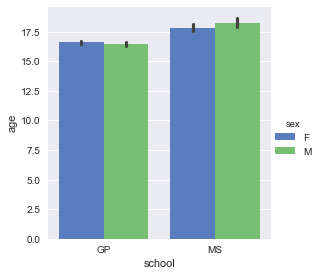

In [53]:
import seaborn as sns
b = sns.factorplot(x="school", y="age", hue="sex", data=studentmath, kind="bar", palette="muted" )

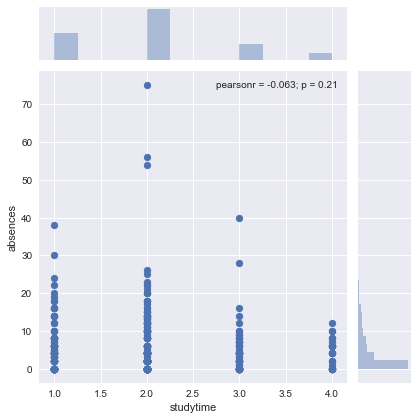

In [55]:
jp = sns.jointplot(x="studytime", y="absences", data=studentmath)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


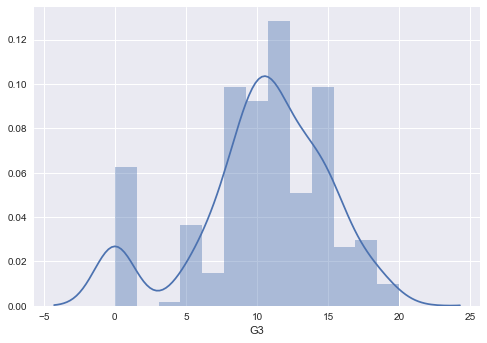

In [57]:
sns.distplot(studentmath.G3)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [60]:
X,y = studentmath.iloc[:,:-3],studentmath.iloc[:,-2]

In [61]:
le=LabelEncoder()
for col in X.columns.values:
    if X[col].dtypes=='object':
        le.fit(X[col].values)
        X[col]=le.transform(X[col])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

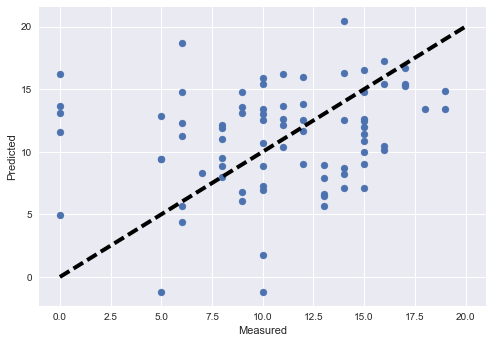

In [64]:
predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [66]:
# SOMEONE ELESE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score

In [74]:
y = studentmath['Average']
X = studentmath.drop(['Average'], axis=1)

In [75]:
X = pd.get_dummies(X)

In [76]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]

In [77]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor: 0.912673165633
LinearRegression: -1.8695211954e+17
Ridge: 0.910459393466
Lasso: 0.909296141423


In [78]:
tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [73]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature Average (0.912607)
2. Feature absences (0.067222)
3. Feature Mjob_teacher (0.005212)
4. Feature age (0.001736)
5. Feature Walc (0.001389)
6. Feature reason_course (0.000907)
7. Feature Mjob_at_home (0.000896)
8. Feature Medu (0.000866)
9. Feature freetime (0.000861)
10. Feature famrel (0.000756)
11. Feature failures (0.000659)
12. Feature traveltime (0.000595)
13. Feature goout (0.000429)
14. Feature sex_M (0.000419)
15. Feature Fjob_health (0.000407)
16. Feature studytime (0.000355)
17. Feature Fjob_services (0.000350)
18. Feature Fedu (0.000345)
19. Feature Fjob_other (0.000333)
20. Feature nursery_yes (0.000324)
21. Feature health (0.000314)
22. Feature Dalc (0.000313)
23. Feature guardian_father (0.000306)
24. Feature internet_no (0.000302)
25. Feature romantic_no (0.000279)
26. Feature paid_no (0.000218)
27. Feature Fjob_at_home (0.000211)
28. Feature internet_yes (0.000208)
29. Feature Pstatus_A (0.000186)
30. Feature romantic_yes (0.000173)
31. Feature address_R (0.00

In [79]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor: 0.910243471478
LinearRegression: -1.8695211954e+17
Ridge: 0.910459393466
Lasso: 0.909296141423


In [81]:
categorical_features = (studentmath.select_dtypes(include=['object']).columns.values)
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [82]:
numerical_features = studentmath.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G3', 'Average'], dtype=object)

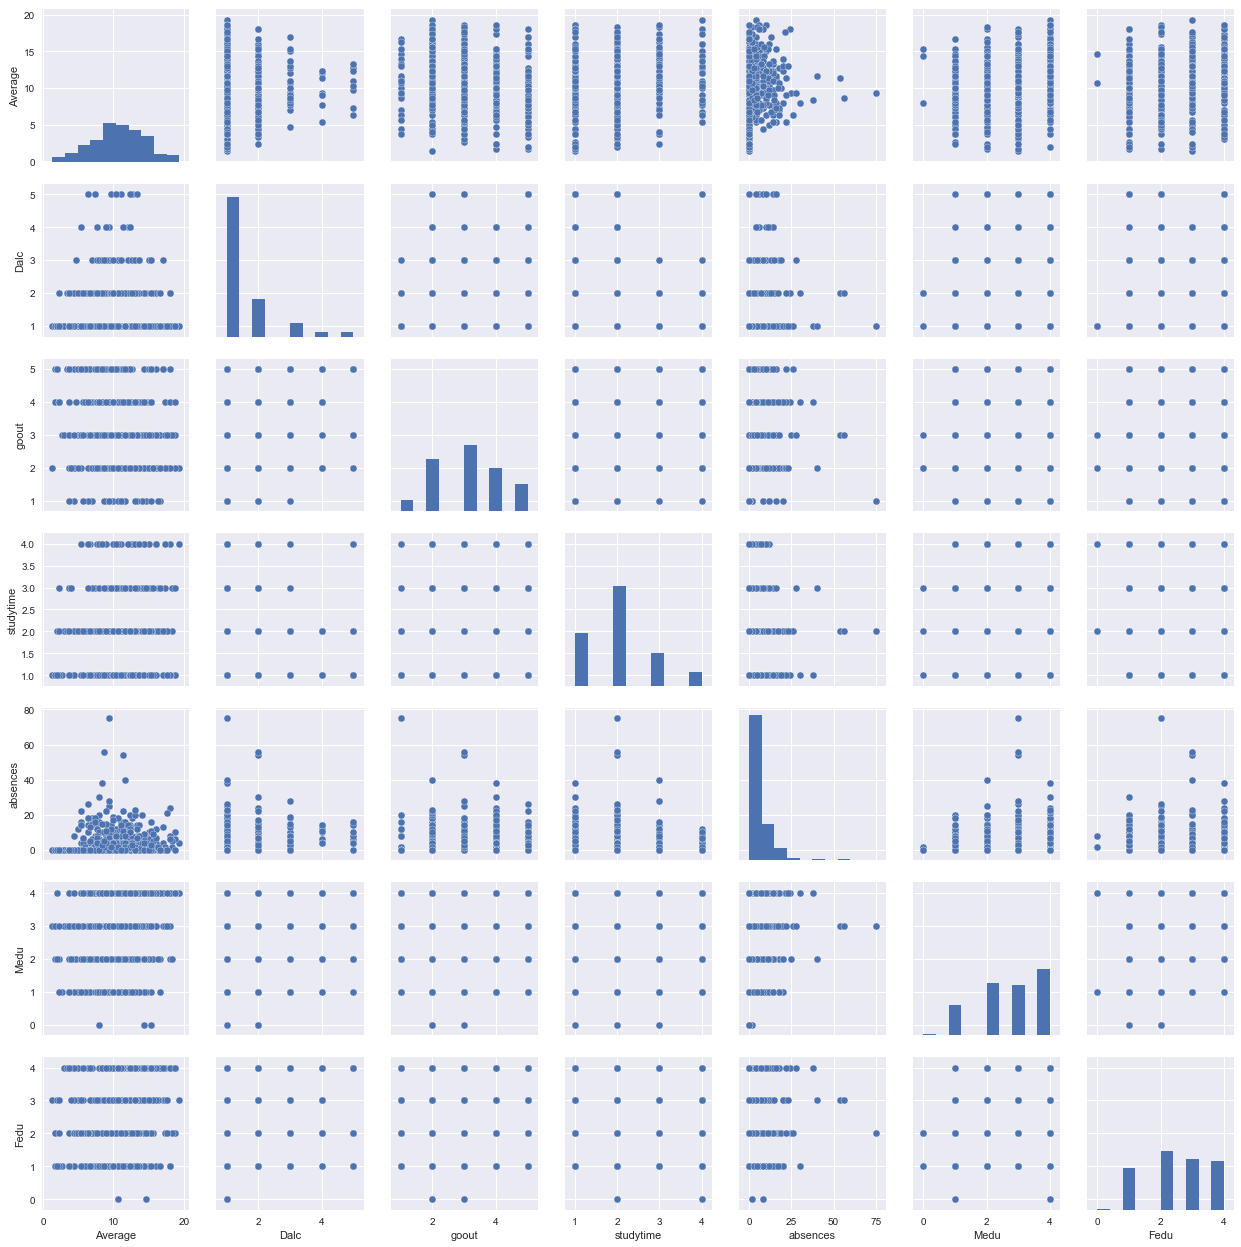

In [85]:
df_small = df[['Average',
               'Dalc', 
               'goout',
               'studytime',
               'absences',
               'Medu',
               'Fedu']]
sns.pairplot(df_small)

In [86]:
mod_df = studentmath 
binaryYesNo = {'yes': 1, 'no': 0}
school_map  = {'MS': 1, 'GP': 2}
sex_map     = {'M': 1, 'F': 2}
address_map = {'R':1, 'U':2}
famsize_map = {'LE3':1, 'GT3':2}
pstatus_map = {'A':1, 'T':2}
mjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

fjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

reason_map   = {'course':1, 'other':2, 'reputation':3, 'home':4}
guardian_map = {'other':0, 'father':1, 'mother':1}

mod_df.schoolsup  = mod_df.schoolsup.map(binaryYesNo)
mod_df.famsup     = mod_df.famsup.map(binaryYesNo)
mod_df.paid       = mod_df.paid.map(binaryYesNo)
mod_df.activities = mod_df.activities.map(binaryYesNo)
mod_df.nursery    = mod_df.nursery.map(binaryYesNo)
mod_df.higher     = mod_df.higher.map(binaryYesNo)
mod_df.internet   = mod_df.internet.map(binaryYesNo)
mod_df.romantic   = mod_df.romantic.map(binaryYesNo)

mod_df.school   = mod_df.school.map(school_map)
mod_df.sex      = mod_df.sex.map(sex_map)
mod_df.address  = mod_df.address.map(address_map)
mod_df.famsize  = mod_df.famsize.map(famsize_map)
mod_df.Pstatus  = mod_df.Pstatus.map(pstatus_map)
mod_df.Mjob     = mod_df.Mjob.map(mjob_map)
mod_df.Fjob     = mod_df.Fjob.map(fjob_map)
mod_df.reason   = mod_df.reason.map(reason_map)
mod_df.guardian = mod_df.guardian.map(guardian_map)

In [91]:
mod_df = mod_df.drop('G3',axis=1)
mod_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Average
0,2,2,18,2,2,1,4,4,4,5,...,0,0,4,3,4,1,1,3,6,5.666667
1,2,2,17,2,2,2,1,1,4,3,...,1,0,5,3,3,1,1,3,4,5.333333
2,2,2,15,2,1,2,1,1,4,3,...,1,0,4,3,2,2,3,3,10,8.333333
3,2,2,15,2,2,2,4,2,2,1,...,1,1,3,2,2,1,1,5,2,14.666667
4,2,2,16,2,2,2,3,3,3,3,...,0,0,4,3,2,1,2,5,4,8.666667


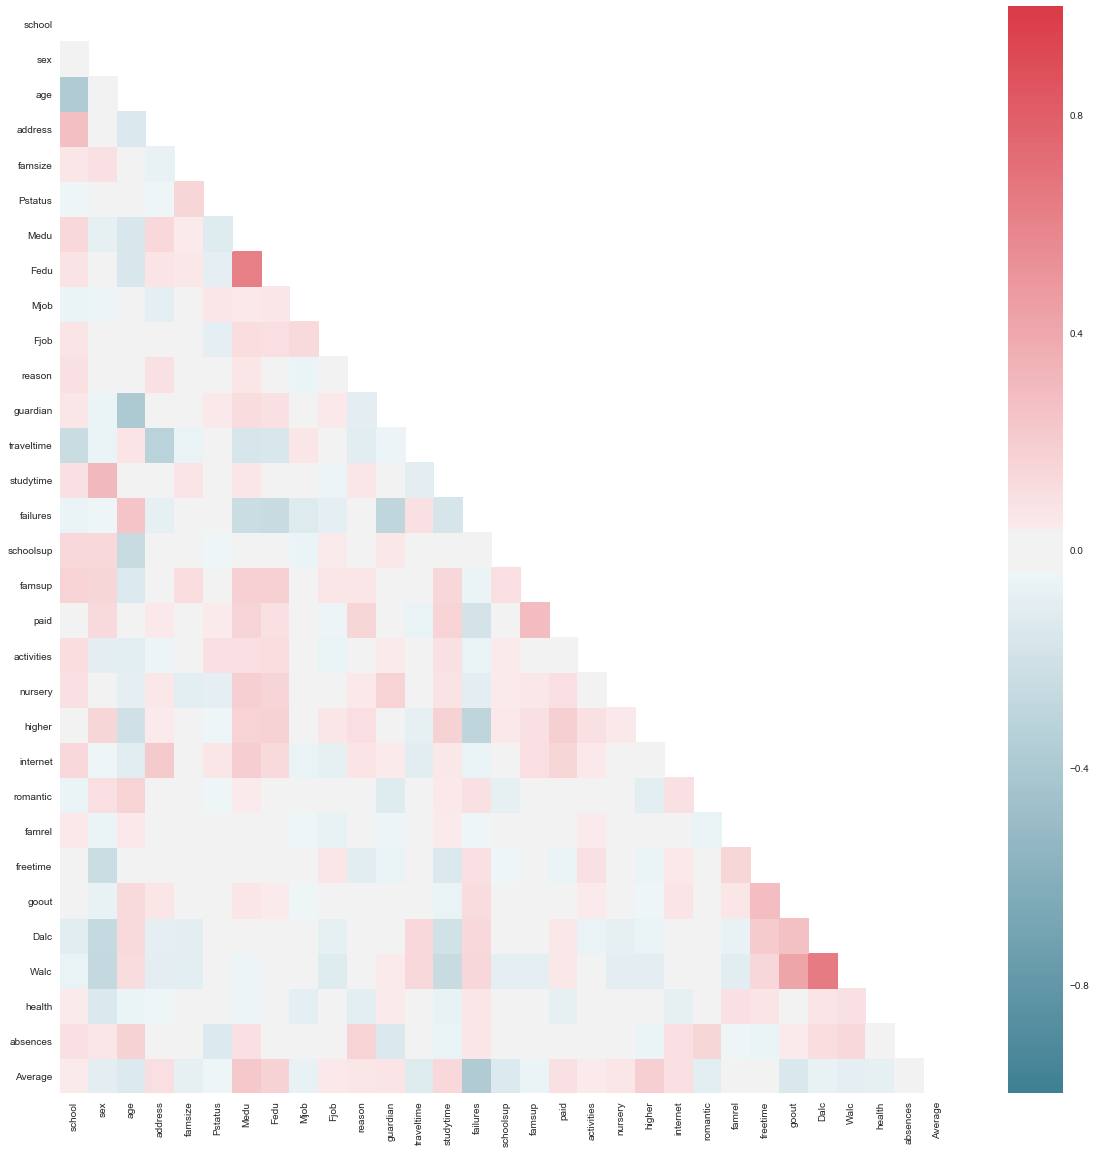

In [92]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = mod_df.corr()
#variable_correlations
heat_map(variable_correlations)

In [94]:
#mother and father education and age and daily alcohol
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

df_copy = pd.get_dummies(mod_df)

df1 = df_copy
y = np.asarray(df1['Average'], dtype="|S6")
df1 = df1.drop(['Average'],axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)

clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , 
                                      indices[f], 
                                      df1.columns[indices[f]], 
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 29 absences (0.067026)
2. feature 2 age (0.062781)
3. feature 25 goout (0.056304)
4. feature 6 Medu (0.049575)
5. feature 23 famrel (0.049457)
6. feature 28 health (0.049131)
7. feature 8 Mjob (0.047212)
8. feature 7 Fedu (0.045778)
9. feature 9 Fjob (0.044147)
10. feature 10 reason (0.043937)
11. feature 27 Walc (0.043362)
12. feature 13 studytime (0.039915)
13. feature 26 Dalc (0.034620)
14. feature 14 failures (0.033906)
15. feature 24 freetime (0.033607)
16. feature 12 traveltime (0.030344)
17. feature 17 paid (0.027392)
18. feature 16 famsup (0.027155)
19. feature 18 activities (0.026192)
20. feature 1 sex (0.025089)
21. feature 19 nursery (0.023674)
22. feature 22 romantic (0.022311)
23. feature 3 address (0.022145)
24. feature 15 schoolsup (0.020284)
25. feature 4 famsize (0.020061)
26. feature 21 internet (0.018533)
27. feature 0 school (0.014204)
28. feature 5 Pstatus (0.011123)
29. feature 11 guardian (0.006006)
30. feature 20 higher (0.004729)
